In [1]:
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from mpl_toolkits import mplot3d

import imblearn
from imblearn.over_sampling import RandomOverSampler

In [2]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X-mean)/std
    
    return X_norm , mean , std

In [3]:
relevant_features = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "diagnosis"]
data = pnd.read_csv("processed.cleveland.csv", names=relevant_features)

data.drop(data[data["ca"] == '?'].index, inplace=True)
data.drop(data[data["thal"] == '?'].index, inplace=True)
data = data.astype('float64') 

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [6]:
data_binary = data.copy()
data_binary["diagnosis"] = data_binary.diagnosis.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
data_binary.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


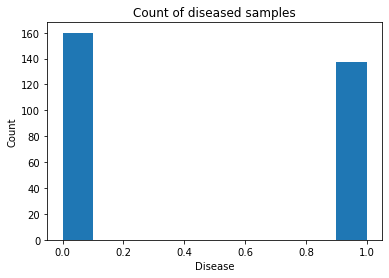

In [7]:
vals = [2**-10,2**-9,2**-8,2**-7,2**-6,2**-5,2**-4,2**-3,2**-2,2**-1,2**0,2**1,2**2,2**3,2**4,2**5,2**5,2**6,2**7,2**8,2**9,2**10]

data_binary_n = data_binary.values

X_binary = data_binary_n[:,:-1]
y_binary = data_binary_n[:,-1]

plt.title("Count of diseased samples")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.hist(y_binary)

X_binary, mean_X, std_X = featureNormalization(X_binary)

In [8]:
cnt_linear = 0

score_total_linear = []
accuracy_total_linear = []
f1_score_total_linear = []
tn_total_linear = []
fn_total_linear = []
tp_total_linear = []
fp_total_linear = []


cnt_gaussian = 0

score_total_gaussian = []
accuracy_total_gaussian = []
f1_score_total_gaussian = []
tn_total_gaussian = []
fn_total_gaussian = []
tp_total_gaussian = []
fp_total_gaussian = []

for x in range(30):

    X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(X_binary, y_binary, test_size = 0.2) #80/0/20
    X_binary_train, X_binary_val, y_binary_train, y_binary_val = train_test_split(X_binary_train, y_binary_train, test_size = 0.25) #60/20/20

    y_binary_train = y_binary_train.reshape(X_binary_train.shape[0],1)
    y_binary_val = y_binary_val.reshape(X_binary_val.shape[0],1)
    y_binary_test = y_binary_test.reshape(X_binary_test.shape[0],1)

    accuracy_train_linear = []
    best_accuracy_train_linear = 0
    accuracy_val_linear = []
    best_accuracy_val_linear = 0

    Best_Cs_linear = []

    accuracy_train_gaussian = []
    best_accuracy_train_gaussian = 0
    accuracy_val_gaussian = []
    best_accuracy_val_gaussian = 0

    Best_Cs_gaussian = []
    Best_Sigmas_gaussian = []

    for i in vals:
        classifier_linear = SVC(C=i, kernel="linear")
        classifier_linear.fit(X_binary_train,np.ravel(y_binary_train))

        prediction_linear = classifier_linear.predict(X_binary_train)
        accuracyTrain_linear = metrics.accuracy_score(y_binary_train, prediction_linear)
        accuracy_train_linear.append(accuracyTrain_linear)

        prediction_linear = classifier_linear.predict(X_binary_val)
        accuracyVal_linear = metrics.accuracy_score(y_binary_val, prediction_linear)
        accuracy_val_linear.append(accuracyVal_linear)

        if(accuracyTrain_linear - accuracyVal_linear < 0.1) and (accuracyTrain_linear - accuracyVal_linear >= 0) and (accuracyTrain_linear > 0.8):
            if(accuracyTrain_linear == best_accuracy_train_linear and accuracyVal_linear == best_accuracy_val_linear):
                Best_Cs_linear.append(i)
            elif(accuracyTrain_linear == best_accuracy_train_linear and accuracyVal_linear > best_accuracy_val_linear):
                Best_Cs = []
                Best_Cs_linear.append(i)
                best_accuracy_val_linear = accuracyVal_linear
            elif(accuracyTrain_linear > best_accuracy_train_linear and accuracyVal_linear == best_accuracy_val_linear):
                Best_Cs_linear = []
                Best_Cs_linear.append(i)
                best_accuracy_train_linear = accuracyTrain_linear
            elif(accuracyTrain_linear > best_accuracy_train_linear and accuracyVal_linear > best_accuracy_val_linear):
                Best_Cs_linear = []
                Best_Cs_linear.append(i)
                best_accuracy_train_linear = accuracyTrain_linear
                best_accuracy_val_linear = accuracyVal_linear

    accuracy_test_linear = []

    Best_C_linear = 0
    best_accuracy_linear = 0

    if(best_accuracy_train_linear != 0):
        cnt_linear += 1
        for i in Best_Cs_linear:
            classifier_linear = SVC(C=i, kernel="linear")
            classifier_linear.fit(X_binary_train,np.ravel(y_binary_train))
            prediction_linear = classifier_linear.predict(X_binary_test)
            accuracy_linear = metrics.accuracy_score(y_binary_test, prediction_linear)

            accuracy_test_linear.append(accuracy_linear)

            if accuracy_linear > best_accuracy_linear :
                Best_C_linear = i

        classifier_linear = SVC(C=Best_C_linear, kernel="linear")
        classifier_linear.fit(X_binary_train,np.ravel(y_binary_train))
        prediction_linear = classifier_linear.predict(X_binary_test)
        classifier_score = classifier_linear.score(X_binary_train,y_binary_train) 
        accuracy_linear = metrics.accuracy_score(y_binary_test, prediction_linear)
        f1_score = metrics.f1_score(y_binary_test, prediction_linear)

        cm_test = confusion_matrix(prediction_linear, y_binary_test)

        score_total_linear.append(classifier_score)
        accuracy_total_linear.append(accuracy_linear)
        f1_score_total_linear.append(f1_score)

        tn = cm_test[0][0]
        fp = cm_test[1][0]
        fn = cm_test[0][1]
        tp = cm_test[1][1]
        
        tn_total_linear.append(tn)
        fn_total_linear.append(fn)
        tp_total_linear.append(tp)
        fp_total_linear.append(fp)

    for i in vals:
        for j in vals:
            classifier_gaussian = SVC(C=i, gamma = 1/j, kernel="rbf")
            classifier_gaussian.fit(X_binary_train,np.ravel(y_binary_train))

            prediction_gaussian = classifier_gaussian.predict(X_binary_train)
            accuracyTrain_gaussian = metrics.accuracy_score(y_binary_train, prediction_gaussian)
            accuracy_train_gaussian.append(accuracyTrain_gaussian)

            prediction_gaussian = classifier_gaussian.predict(X_binary_val)
            accuracyVal_gaussian = metrics.accuracy_score(y_binary_val, prediction_gaussian)
            accuracy_val_gaussian.append(accuracyVal_gaussian)

            if(accuracyTrain_gaussian - accuracyVal_gaussian < 0.1) and (accuracyTrain_gaussian - accuracyVal_gaussian >= 0) and (accuracyTrain_gaussian > 0.8):
                if(accuracyTrain_gaussian == best_accuracy_train_gaussian and accuracyVal_gaussian == best_accuracy_val_gaussian):
                    Best_Cs_gaussian.append(i)
                    Best_Sigmas_gaussian.append(j)
                elif(accuracyTrain_gaussian == best_accuracy_train_gaussian and accuracyVal_gaussian > best_accuracy_val_gaussian):
                    Best_Cs_gaussian = []
                    Best_Cs_gaussian.append(i)
                    Best_Sigmas_gaussian = []
                    Best_Sigmas_gaussian.append(j)
                    Best_accuracy_val_gaussian = accuracyVal_gaussian
                elif(accuracyTrain_gaussian > best_accuracy_train_gaussian and accuracyVal_gaussian == best_accuracy_val_gaussian):
                    Best_Cs_gaussian = []
                    Best_Cs_gaussian.append(i)
                    Best_Sigmas_gaussian = []
                    Best_Sigmas_gaussian.append(j)
                    best_accuracy_train_gaussian = accuracyTrain_gaussian
                elif(accuracyTrain_gaussian > best_accuracy_train_gaussian and accuracyVal_gaussian > best_accuracy_val_gaussian):
                    Best_Cs_gaussian = []
                    Best_Cs_gaussian.append(i)
                    Best_Sigmas_gaussian = []
                    Best_Sigmas_gaussian.append(j)
                    best_accuracy_train_gaussian = accuracyTrain_gaussian
                    best_accuracy_val_gaussian = accuracyVal_gaussian

    accuracy_test_gaussian = []

    Best_C_gaussian = 0
    Best_Sigma_gaussian = 0
    best_accuracy_gaussian = 0

    if(best_accuracy_train_gaussian != 0):
        cnt_gaussian += 1
        for i in range(len(Best_Sigmas_gaussian)):
            classifier_gaussian = SVC(C=Best_Cs_gaussian[i], gamma=1/Best_Sigmas_gaussian[i], kernel="rbf")
            classifier_gaussian.fit(X_binary_train,np.ravel(y_binary_train))
            prediction_gaussian = classifier_gaussian.predict(X_binary_test)
            accuracy_gaussian = metrics.accuracy_score(y_binary_test, prediction_gaussian)

            accuracy_test_gaussian.append(accuracy_gaussian)

            if accuracy_gaussian > best_accuracy_gaussian :
                Best_C_gaussian = Best_Cs_gaussian[i]
                Best_Sigma_gaussian = Best_Sigmas_gaussian[i]

        classifier_gaussian = SVC(C=Best_C_gaussian, gamma=1/Best_Sigma_gaussian, kernel="rbf")
        classifier_gaussian.fit(X_binary_train,np.ravel(y_binary_train))
        prediction_gaussian = classifier_gaussian.predict(X_binary_test)
        classifier_score = classifier_gaussian.score(X_binary_train,y_binary_train) 
        accuracy_gaussian = metrics.accuracy_score(y_binary_test, prediction_gaussian)
        f1_score = metrics.f1_score(y_binary_test, prediction_gaussian)

        cm_test = confusion_matrix(prediction_gaussian, y_binary_test)

        score_total_gaussian.append(classifier_score)
        accuracy_total_gaussian.append(accuracy_gaussian)
        f1_score_total_gaussian.append(f1_score)

        tn = cm_test[0][0]
        fp = cm_test[1][0]
        fn = cm_test[0][1]
        tp = cm_test[1][1]
        
        tn_total_gaussian.append(tn)
        fn_total_gaussian.append(fn)
        tp_total_gaussian.append(tp)
        fp_total_gaussian.append(fp)

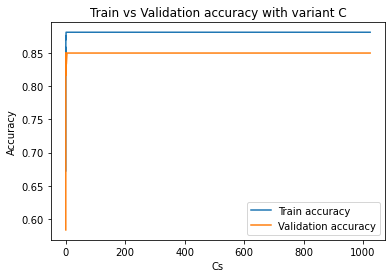

In [9]:
# plt.plot(range(1,len(accuracy_train_linear)+1),accuracy_train_linear)
# plt.plot(range(1,len(accuracy_val_linear)+1),accuracy_val_linear)
# plt.ylabel("Accuracy")
# plt.xlabel("Number of C tested")
# plt.legend(["Train accuracy", "Validation accuracy"])
# plt.show()

plt.plot(vals,accuracy_train_linear)
plt.plot(vals,accuracy_val_linear)
plt.ylabel("Accuracy")
plt.xlabel("Cs")
plt.legend(["Train accuracy", "Validation accuracy"])
plt.title("Train vs Validation accuracy with variant C")
plt.show()

27


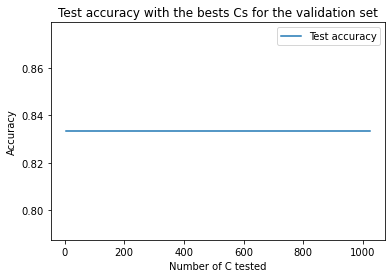

In [10]:
# print(best_accuracy_train)
print(cnt_linear)

if(len(accuracy_test_linear) > 1):
    # plt.plot(range(1,len(accuracy_test_linear)+1),accuracy_test_linear)
    plt.plot(Best_Cs_linear,accuracy_test_linear)
    plt.ylabel("Accuracy")
    plt.xlabel("Number of C tested")
    plt.legend(["Test accuracy"])
    plt.title("Test accuracy with the bests Cs for the validation set")
    plt.show()

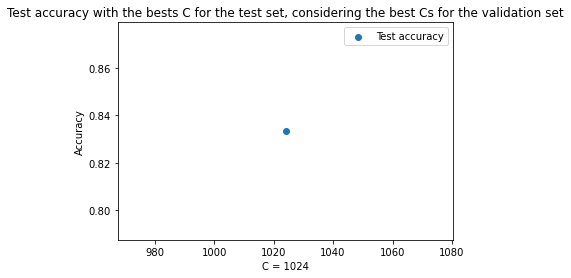

In [11]:
# plt.scatter(1,accuracy_linear)
plt.scatter(Best_C_linear,accuracy_linear)
plt.ylabel("Accuracy")
plt.xlabel("C = " + str(Best_C_linear))
plt.legend(["Test accuracy"])
plt.title("Test accuracy with the bests C for the test set, considering the best Cs for the validation set")
plt.show()

Mean linear kernel classification:  0.8681732580037665
Mean linear kernel accuracy:  0.8240740740740741
Mean linear kernel F1:  0.7965523826875668


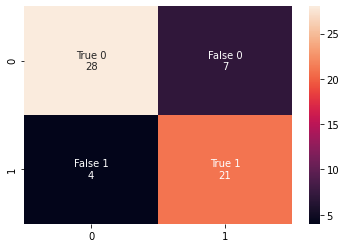

In [12]:
cm_linear = np.array([np.around(np.mean(tn_total_linear), 0), np.around(np.mean(fn_total_linear), 0), np.around(np.mean(fp_total_linear), 0), np.around(np.mean(tp_total_linear), 0)])

group_names = ["True 0","False 0","False 1","True 1"]
group_counts = ["{0:0.0f}".format(value) for value in cm_linear]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_linear.reshape(2,2), annot=labels, fmt="")

print("Mean linear kernel classification: ", np.mean(score_total_linear))
print("Mean linear kernel accuracy: ", np.mean(accuracy_total_linear))
print("Mean linear kernel F1: ", np.mean(f1_score_total_linear))

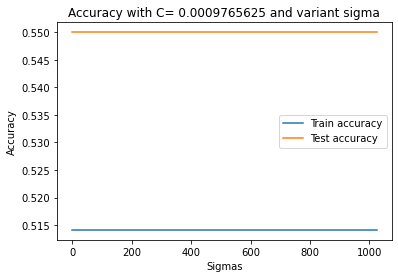

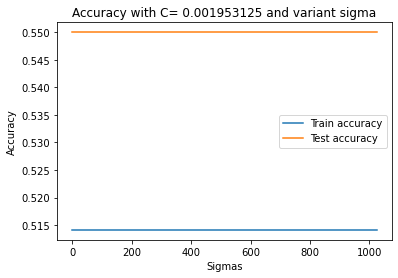

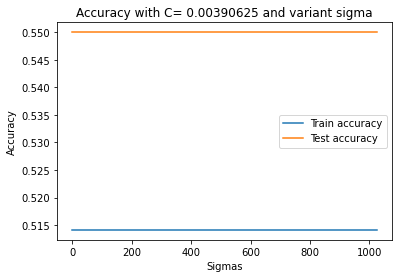

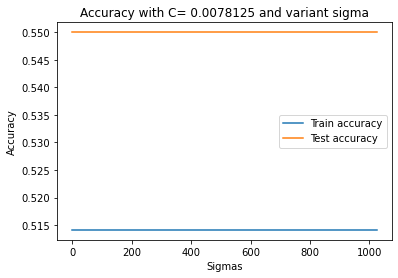

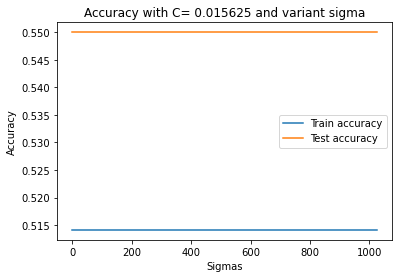

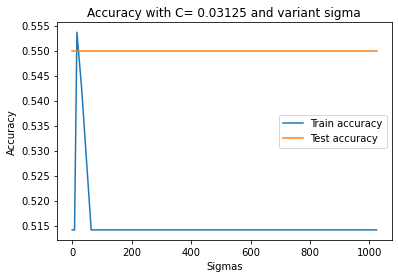

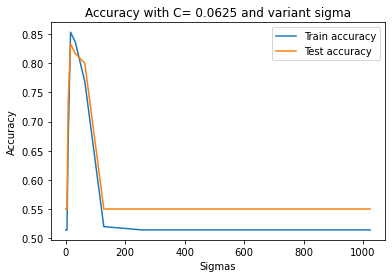

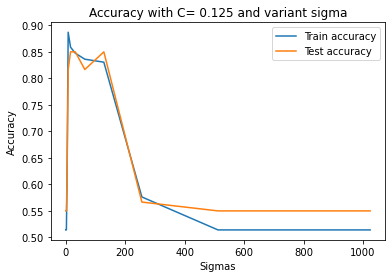

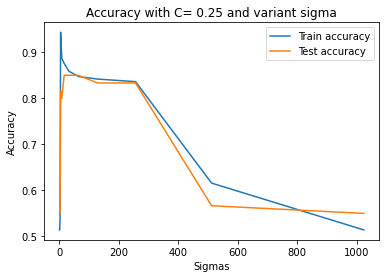

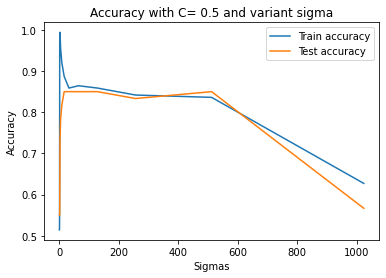

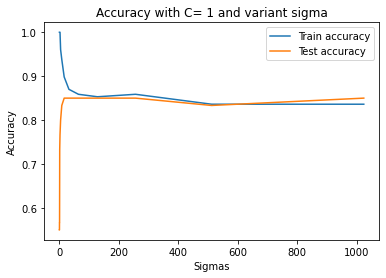

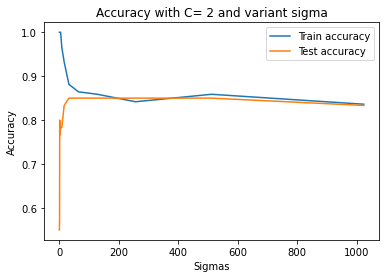

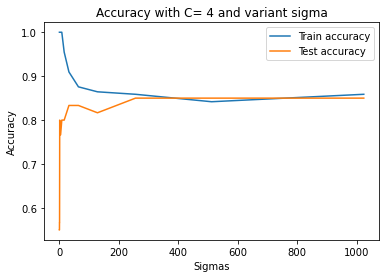

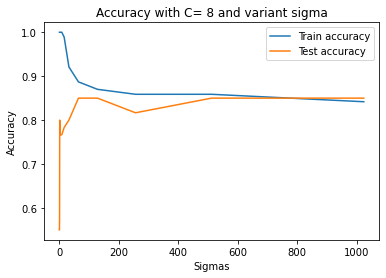

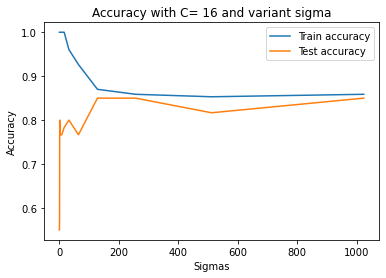

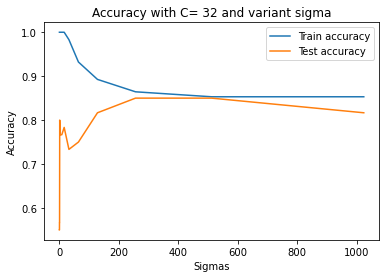

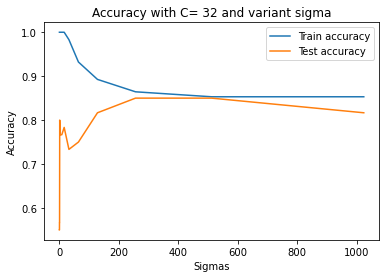

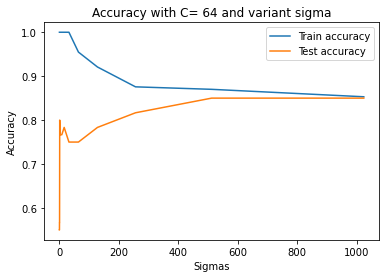

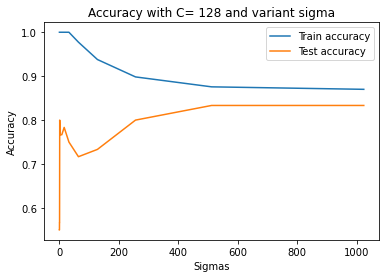

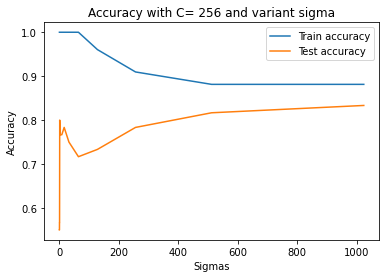

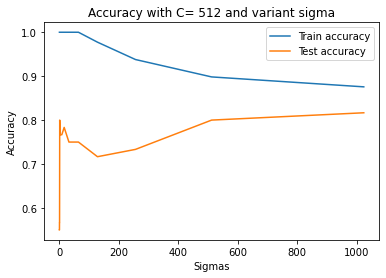

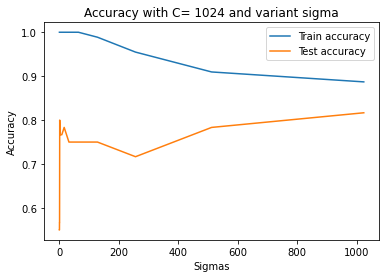

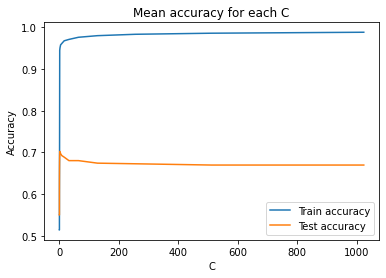

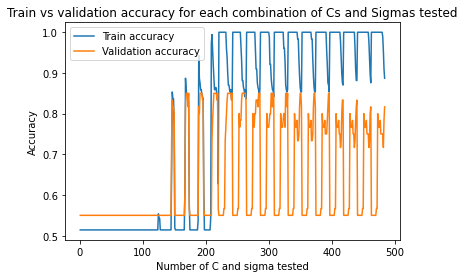

In [13]:
mean_acc_train_fixed_c = []
mean_acc_val_fixed_c = []

for i in range(len(vals)):
    plt.plot(vals,accuracy_train_gaussian[22*i:22*(i+1)])
    plt.plot(vals,accuracy_val_gaussian[22*i:22*(i+1)])
    mean_acc_train_fixed_c.append(np.mean(accuracy_train_gaussian[22*i:22*(i+1)]))
    mean_acc_val_fixed_c.append(np.mean(accuracy_val_gaussian[22*i:22*(i+1)]))
    plt.ylabel("Accuracy")
    plt.xlabel("Sigmas")
    plt.legend(["Train accuracy","Test accuracy"])
    plt.title("Accuracy with C= "+str(vals[i])+ " and variant sigma")
    plt.show()

plt.plot(vals, mean_acc_train_fixed_c)
plt.plot(vals, mean_acc_val_fixed_c)
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend(["Train accuracy","Test accuracy"])
plt.title("Mean accuracy for each C")
plt.show()

plt.plot(range(1,len(accuracy_train_gaussian)+1),accuracy_train_gaussian)
plt.plot(range(1,len(accuracy_val_gaussian)+1),accuracy_val_gaussian)
plt.ylabel("Accuracy")
plt.xlabel("Number of C and sigma tested")
plt.legend(["Train accuracy", "Validation accuracy"])
plt.title("Train vs validation accuracy for each combination of Cs and Sigmas tested")
plt.show()

In [14]:
print(cnt_gaussian)

if(len(accuracy_test_gaussian) > 1):
    plt.plot(range(1,len(accuracy_test_gaussian)+1),accuracy_test_gaussian)
    plt.ylabel("Accuracy")
    plt.xlabel("Number of C and sigma tested")
    plt.legend(["Test accuracy"])
    plt.title("Test accuracy with the bests Cs and Sigmas for the validation set")
    plt.show()

30


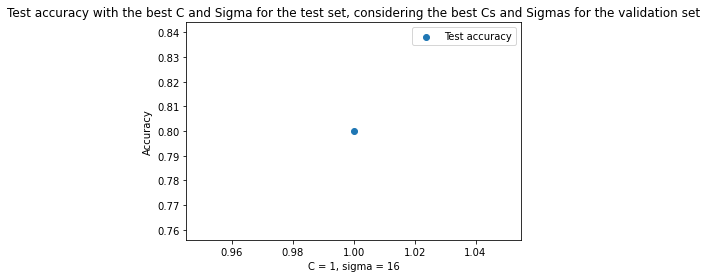

In [15]:
plt.scatter(Best_C_gaussian,accuracy_gaussian)
plt.ylabel("Accuracy")
plt.xlabel("C = " + str(Best_C_gaussian) + ", sigma = " + str(Best_Sigma_gaussian))
plt.legend(["Test accuracy"])
plt.title("Test accuracy with the best C and Sigma for the test set, considering the best Cs and Sigmas for the validation set")
plt.show()

Mean gaussian kernel classification:  0.926177024482109
Mean gaussian kernel accuracy:  0.8016666666666666
Mean gaussian kernel F1:  0.776595009093441


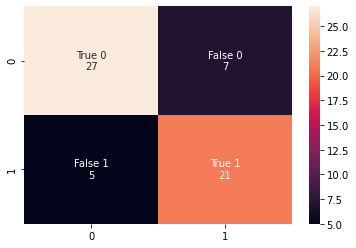

In [16]:
cm_gaussian = np.array([np.around(np.mean(tn_total_gaussian), 0), np.around(np.mean(fn_total_gaussian), 0), np.around(np.mean(fp_total_gaussian), 0), np.around(np.mean(tp_total_gaussian), 0)])

group_names = ["True 0","False 0","False 1","True 1"]
group_counts = ["{0:0.0f}".format(value) for value in cm_gaussian]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_gaussian.reshape(2,2), annot=labels, fmt="")

print("Mean gaussian kernel classification: ", np.mean(score_total_gaussian))
print("Mean gaussian kernel accuracy: ", np.mean(accuracy_total_gaussian))
print("Mean gaussian kernel F1: ", np.mean(f1_score_total_gaussian))

(array([160.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 160.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

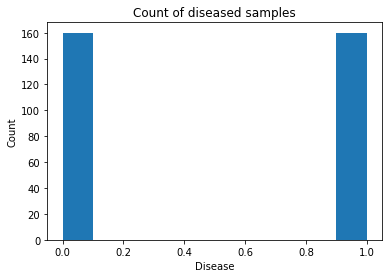

In [17]:
ros = RandomOverSampler()
X_binary, y_binary = ros.fit_sample(X_binary, y_binary)

plt.title("Count of diseased samples")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.hist(y_binary)

In [18]:
 cnt_linear = 0

score_total_linear = []
accuracy_total_linear = []
f1_score_total_linear = []
tn_total_linear = []
fn_total_linear = []
tp_total_linear = []
fp_total_linear = []


cnt_gaussian = 0

score_total_gaussian = []
accuracy_total_gaussian = []
f1_score_total_gaussian = []
tn_total_gaussian = []
fn_total_gaussian = []
tp_total_gaussian = []
fp_total_gaussian = []

for x in range(30):

    X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(X_binary, y_binary, test_size = 0.2) #80/0/20
    X_binary_train, X_binary_val, y_binary_train, y_binary_val = train_test_split(X_binary_train, y_binary_train, test_size = 0.25) #60/20/20

    y_binary_train = y_binary_train.reshape(X_binary_train.shape[0],1)
    y_binary_val = y_binary_val.reshape(X_binary_val.shape[0],1)
    y_binary_test = y_binary_test.reshape(X_binary_test.shape[0],1)

    accuracy_train_linear = []
    best_accuracy_train_linear = 0
    accuracy_val_linear = []
    best_accuracy_val_linear = 0

    Best_Cs_linear = []

    accuracy_train_gaussian = []
    best_accuracy_train_gaussian = 0
    accuracy_val_gaussian = []
    best_accuracy_val_gaussian = 0

    Best_Cs_gaussian = []
    Best_Sigmas_gaussian = []

    for i in vals:
        classifier_linear = SVC(C=i, kernel="linear")
        classifier_linear.fit(X_binary_train,np.ravel(y_binary_train))

        prediction_linear = classifier_linear.predict(X_binary_train)
        accuracyTrain_linear = metrics.accuracy_score(y_binary_train, prediction_linear)
        accuracy_train_linear.append(accuracyTrain_linear)

        prediction_linear = classifier_linear.predict(X_binary_val)
        accuracyVal_linear = metrics.accuracy_score(y_binary_val, prediction_linear)
        accuracy_val_linear.append(accuracyVal_linear)

        if(accuracyTrain_linear - accuracyVal_linear < 0.1) and (accuracyTrain_linear - accuracyVal_linear >= 0) and (accuracyTrain_linear > 0.8):
            if(accuracyTrain_linear == best_accuracy_train_linear and accuracyVal_linear == best_accuracy_val_linear):
                Best_Cs_linear.append(i)
            elif(accuracyTrain_linear == best_accuracy_train_linear and accuracyVal_linear > best_accuracy_val_linear):
                Best_Cs = []
                Best_Cs_linear.append(i)
                best_accuracy_val_linear = accuracyVal_linear
            elif(accuracyTrain_linear > best_accuracy_train_linear and accuracyVal_linear == best_accuracy_val_linear):
                Best_Cs_linear = []
                Best_Cs_linear.append(i)
                best_accuracy_train_linear = accuracyTrain_linear
            elif(accuracyTrain_linear > best_accuracy_train_linear and accuracyVal_linear > best_accuracy_val_linear):
                Best_Cs_linear = []
                Best_Cs_linear.append(i)
                best_accuracy_train_linear = accuracyTrain_linear
                best_accuracy_val_linear = accuracyVal_linear

    accuracy_test_linear = []

    Best_C_linear = 0
    best_accuracy_linear = 0

    if(best_accuracy_train_linear != 0):
        cnt_linear += 1
        for i in Best_Cs_linear:
            classifier_linear = SVC(C=i, kernel="linear")
            classifier_linear.fit(X_binary_train,np.ravel(y_binary_train))
            prediction_linear = classifier_linear.predict(X_binary_test)
            accuracy_linear = metrics.accuracy_score(y_binary_test, prediction_linear)

            accuracy_test_linear.append(accuracy_linear)

            if accuracy_linear > best_accuracy_linear :
                Best_C_linear = i

        classifier_linear = SVC(C=Best_C_linear, kernel="linear")
        classifier_linear.fit(X_binary_train,np.ravel(y_binary_train))
        prediction_linear = classifier_linear.predict(X_binary_test)
        classifier_score = classifier_linear.score(X_binary_train,y_binary_train) 
        accuracy_linear = metrics.accuracy_score(y_binary_test, prediction_linear)
        f1_score = metrics.f1_score(y_binary_test, prediction_linear)

        cm_test = confusion_matrix(prediction_linear, y_binary_test)

        score_total_linear.append(classifier_score)
        accuracy_total_linear.append(accuracy_linear)
        f1_score_total_linear.append(f1_score)

        tn = cm_test[0][0]
        fp = cm_test[1][0]
        fn = cm_test[0][1]
        tp = cm_test[1][1]
        
        tn_total_linear.append(tn)
        fn_total_linear.append(fn)
        tp_total_linear.append(tp)
        fp_total_linear.append(fp)

    for i in vals:
        for j in vals:
            classifier_gaussian = SVC(C=i, gamma = 1/j, kernel="rbf")
            classifier_gaussian.fit(X_binary_train,np.ravel(y_binary_train))

            prediction_gaussian = classifier_gaussian.predict(X_binary_train)
            accuracyTrain_gaussian = metrics.accuracy_score(y_binary_train, prediction_gaussian)
            accuracy_train_gaussian.append(accuracyTrain_gaussian)

            prediction_gaussian = classifier_gaussian.predict(X_binary_val)
            accuracyVal_gaussian = metrics.accuracy_score(y_binary_val, prediction_gaussian)
            accuracy_val_gaussian.append(accuracyVal_gaussian)

            if(accuracyTrain_gaussian - accuracyVal_gaussian < 0.1) and (accuracyTrain_gaussian - accuracyVal_gaussian >= 0) and (accuracyTrain_gaussian > 0.8):
                if(accuracyTrain_gaussian == best_accuracy_train_gaussian and accuracyVal_gaussian == best_accuracy_val_gaussian):
                    Best_Cs_gaussian.append(i)
                    Best_Sigmas_gaussian.append(j)
                elif(accuracyTrain_gaussian == best_accuracy_train_gaussian and accuracyVal_gaussian > best_accuracy_val_gaussian):
                    Best_Cs_gaussian = []
                    Best_Cs_gaussian.append(i)
                    Best_Sigmas_gaussian = []
                    Best_Sigmas_gaussian.append(j)
                    Best_accuracy_val_gaussian = accuracyVal_gaussian
                elif(accuracyTrain_gaussian > best_accuracy_train_gaussian and accuracyVal_gaussian == best_accuracy_val_gaussian):
                    Best_Cs_gaussian = []
                    Best_Cs_gaussian.append(i)
                    Best_Sigmas_gaussian = []
                    Best_Sigmas_gaussian.append(j)
                    best_accuracy_train_gaussian = accuracyTrain_gaussian
                elif(accuracyTrain_gaussian > best_accuracy_train_gaussian and accuracyVal_gaussian > best_accuracy_val_gaussian):
                    Best_Cs_gaussian = []
                    Best_Cs_gaussian.append(i)
                    Best_Sigmas_gaussian = []
                    Best_Sigmas_gaussian.append(j)
                    best_accuracy_train_gaussian = accuracyTrain_gaussian
                    best_accuracy_val_gaussian = accuracyVal_gaussian

    accuracy_test_gaussian = []

    Best_C_gaussian = 0
    Best_Sigma_gaussian = 0
    best_accuracy_gaussian = 0

    if(best_accuracy_train_gaussian != 0):
        cnt_gaussian += 1
        for i in range(len(Best_Sigmas_gaussian)):
            classifier_gaussian = SVC(C=Best_Cs_gaussian[i], gamma=1/Best_Sigmas_gaussian[i], kernel="rbf")
            classifier_gaussian.fit(X_binary_train,np.ravel(y_binary_train))
            prediction_gaussian = classifier_gaussian.predict(X_binary_test)
            accuracy_gaussian = metrics.accuracy_score(y_binary_test, prediction_gaussian)

            accuracy_test_gaussian.append(accuracy_gaussian)

            if accuracy_gaussian > best_accuracy_gaussian :
                Best_C_gaussian = Best_Cs_gaussian[i]
                Best_Sigma_gaussian = Best_Sigmas_gaussian[i]

        classifier_gaussian = SVC(C=Best_C_gaussian, gamma=1/Best_Sigma_gaussian, kernel="rbf")
        classifier_gaussian.fit(X_binary_train,np.ravel(y_binary_train))
        prediction_gaussian = classifier_gaussian.predict(X_binary_test)
        classifier_score = classifier_gaussian.score(X_binary_train,y_binary_train) 
        accuracy_gaussian = metrics.accuracy_score(y_binary_test, prediction_gaussian)
        f1_score = metrics.f1_score(y_binary_test, prediction_gaussian)

        cm_test = confusion_matrix(prediction_gaussian, y_binary_test)

        score_total_gaussian.append(classifier_score)
        accuracy_total_gaussian.append(accuracy_gaussian)
        f1_score_total_gaussian.append(f1_score)

        tn = cm_test[0][0]
        fp = cm_test[1][0]
        fn = cm_test[0][1]
        tp = cm_test[1][1]
        
        tn_total_gaussian.append(tn)
        fn_total_gaussian.append(fn)
        tp_total_gaussian.append(tp)
        fp_total_gaussian.append(fp)

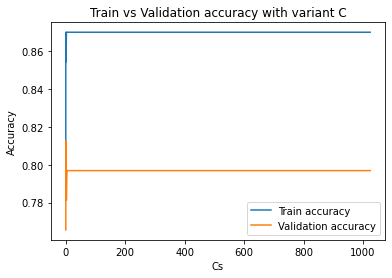

In [19]:
plt.plot(vals,accuracy_train_linear)
plt.plot(vals,accuracy_val_linear)
plt.ylabel("Accuracy")
plt.xlabel("Cs")
plt.legend(["Train accuracy", "Validation accuracy"])
plt.title("Train vs Validation accuracy with variant C")
plt.show()

In [20]:
# print(best_accuracy_train)
print(cnt_linear)

if(len(accuracy_test_linear) > 1):
    plt.plot(Best_Cs_linear,accuracy_test_linear)
    plt.ylabel("Accuracy")
    plt.xlabel("Number of C tested")
    plt.legend(["Test accuracy"])
    plt.title("Test accuracy with the bests Cs for the validation set")
    plt.show()

24


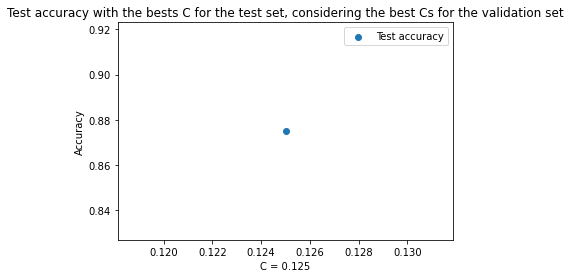

In [21]:
plt.scatter(Best_C_linear, accuracy_linear)
plt.ylabel("Accuracy")
plt.xlabel("C = " + str(Best_C_linear))
plt.legend(["Test accuracy"])
plt.title("Test accuracy with the bests C for the test set, considering the best Cs for the validation set")
plt.show()

Mean linear kernel classification:  0.8678385416666666
Mean linear kernel accuracy:  0.8372395833333334
Mean linear kernel F1:  0.8305469354849601


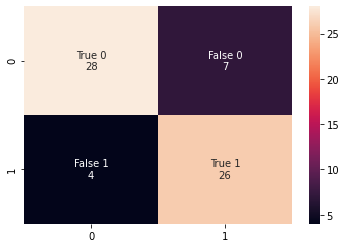

In [22]:
cm_linear = np.array([np.around(np.mean(tn_total_linear), 0), np.around(np.mean(fn_total_linear), 0), np.around(np.mean(fp_total_linear), 0), np.around(np.mean(tp_total_linear), 0)])

group_names = ["True 0","False 0","False 1","True 1"]
group_counts = ["{0:0.0f}".format(value) for value in cm_linear]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_linear.reshape(2,2), annot=labels, fmt="")

print("Mean linear kernel classification: ", np.mean(score_total_linear))
print("Mean linear kernel accuracy: ", np.mean(accuracy_total_linear))
print("Mean linear kernel F1: ", np.mean(f1_score_total_linear))

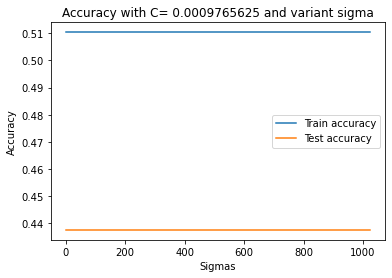

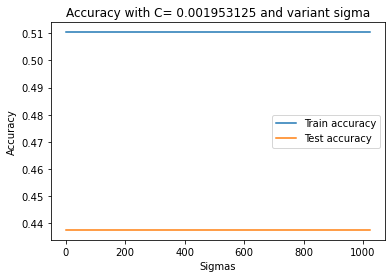

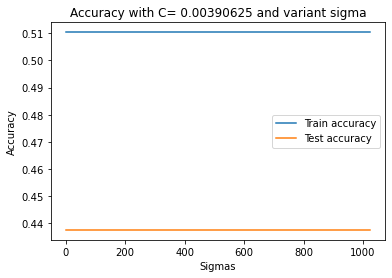

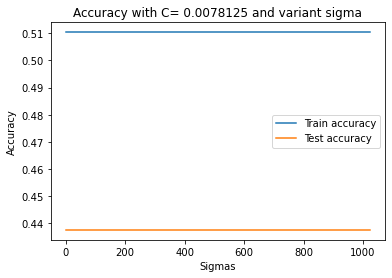

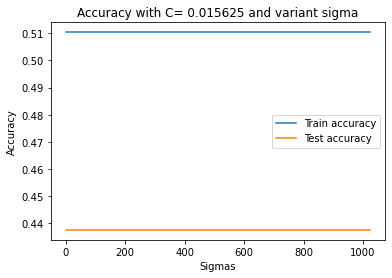

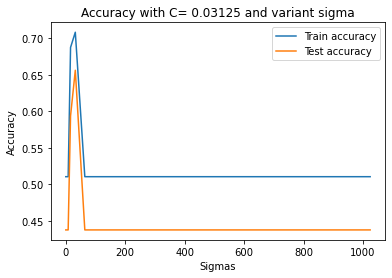

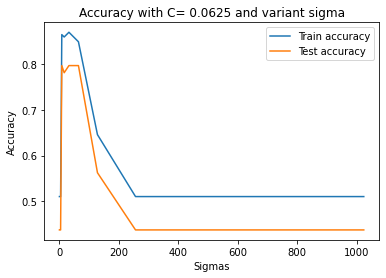

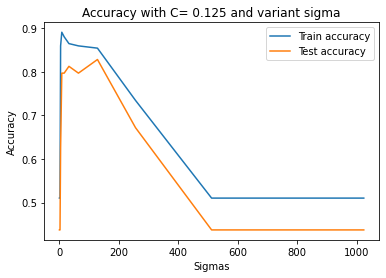

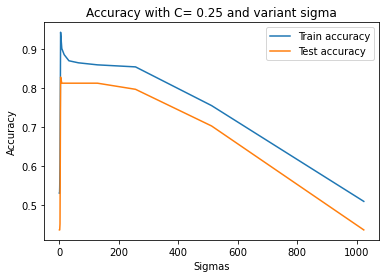

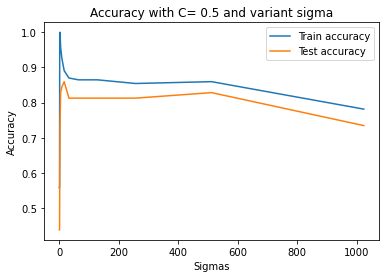

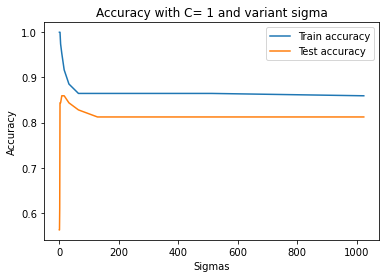

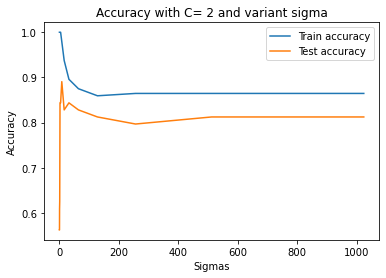

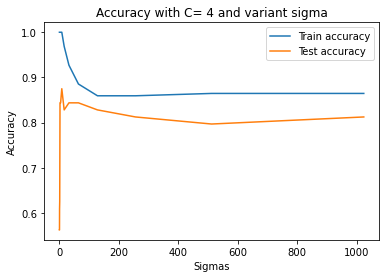

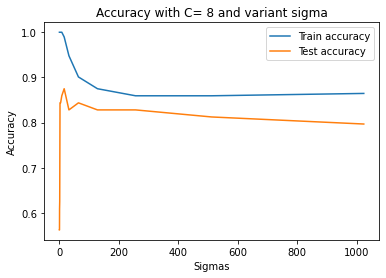

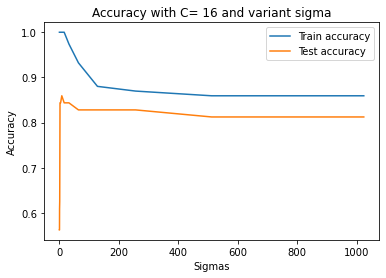

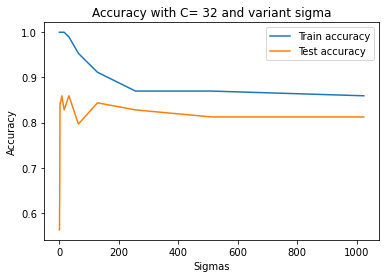

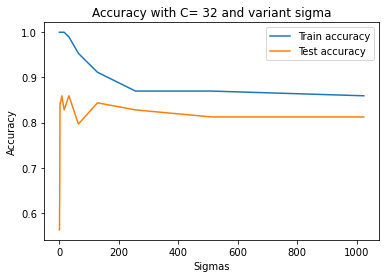

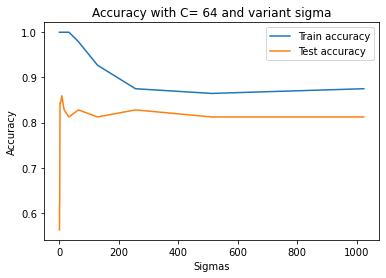

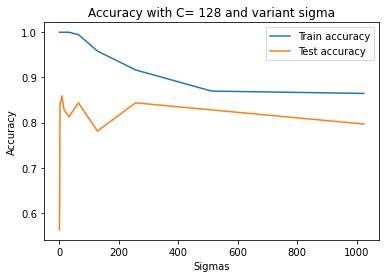

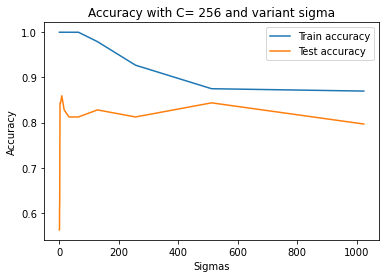

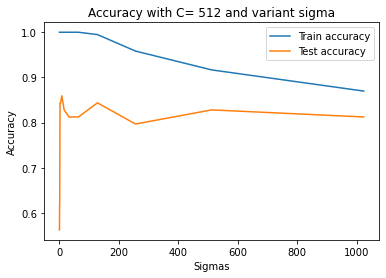

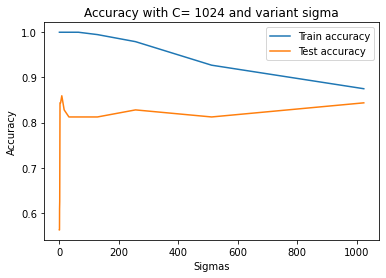

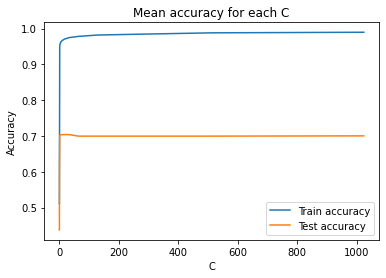

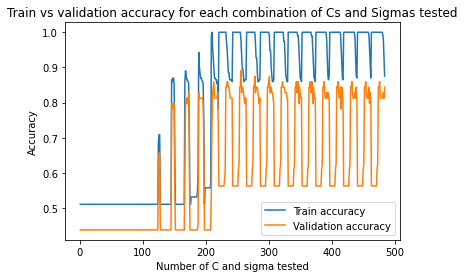

In [23]:
mean_acc_train_fixed_c = []
mean_acc_val_fixed_c = []

for i in range(len(vals)):
    plt.plot(vals,accuracy_train_gaussian[22*i:22*(i+1)])
    plt.plot(vals,accuracy_val_gaussian[22*i:22*(i+1)])
    mean_acc_train_fixed_c.append(np.mean(accuracy_train_gaussian[22*i:22*(i+1)]))
    mean_acc_val_fixed_c.append(np.mean(accuracy_val_gaussian[22*i:22*(i+1)]))
    plt.ylabel("Accuracy")
    plt.xlabel("Sigmas")
    plt.legend(["Train accuracy","Test accuracy"])
    plt.title("Accuracy with C= "+str(vals[i])+ " and variant sigma")
    plt.show()

plt.plot(vals, mean_acc_train_fixed_c)
plt.plot(vals, mean_acc_val_fixed_c)
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend(["Train accuracy","Test accuracy"])
plt.title("Mean accuracy for each C")
plt.show()

plt.plot(range(1,len(accuracy_train_gaussian)+1),accuracy_train_gaussian)
plt.plot(range(1,len(accuracy_val_gaussian)+1),accuracy_val_gaussian)
plt.ylabel("Accuracy")
plt.xlabel("Number of C and sigma tested")
plt.legend(["Train accuracy", "Validation accuracy"])
plt.title("Train vs validation accuracy for each combination of Cs and Sigmas tested")
plt.show()

In [24]:
print(cnt_gaussian)

if(len(accuracy_test_gaussian) > 1):
    plt.plot(range(1,len(accuracy_test_gaussian)+1),accuracy_test_gaussian)
    plt.ylabel("Accuracy")
    plt.xlabel("Number of C and sigma tested")
    plt.legend(["Test accuracy"])
    plt.title("Test accuracy with the bests Cs and Sigmas for the validation set")
    plt.show()

30


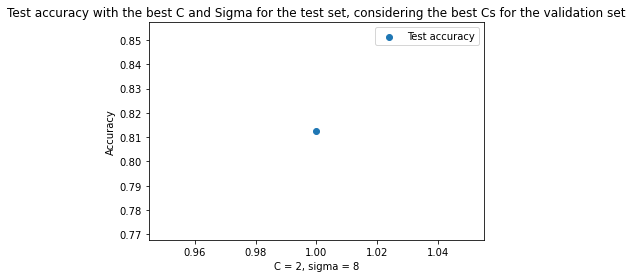

In [25]:
plt.scatter(1,accuracy_gaussian)
plt.ylabel("Accuracy")
plt.xlabel("C = " + str(Best_C_gaussian) + ", sigma = " + str(Best_Sigma_gaussian))
plt.legend(["Test accuracy"])
plt.title("Test accuracy with the best C and Sigma for the test set, considering the best Cs for the validation set")
plt.show()

Mean gaussian kernel classification:  0.9385416666666667
Mean gaussian kernel accuracy:  0.8114583333333333
Mean gaussian kernel F1:  0.811230814010425


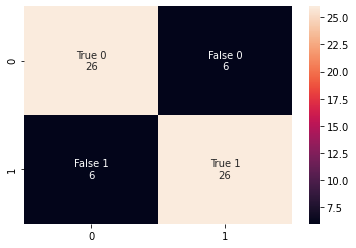

In [26]:
cm_gaussian = np.array([np.around(np.mean(tn_total_gaussian), 0), np.around(np.mean(fn_total_gaussian), 0), np.around(np.mean(fp_total_gaussian), 0), np.around(np.mean(tp_total_gaussian), 0)])

group_names = ["True 0","False 0","False 1","True 1"]
group_counts = ["{0:0.0f}".format(value) for value in cm_gaussian]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_gaussian.reshape(2,2), annot=labels, fmt="")

print("Mean gaussian kernel classification: ", np.mean(score_total_gaussian))
print("Mean gaussian kernel accuracy: ", np.mean(accuracy_total_gaussian))
print("Mean gaussian kernel F1: ", np.mean(f1_score_total_gaussian))